In [91]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

In [54]:
df= pd.read_csv('50_startups.csv')

In [55]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
#profit is dependent var, so excludig from the dataset.
#df.drop('Profit',axis=1).head()

In [87]:
#In order to predict the profit, lets store it in y variable.
#y=['Profit']
#y
#y is a list of prediction variables, in this case it is profit.

x=df.iloc[:,:-1]
y=df.iloc[:,4]
x.head()
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [58]:
df.info()
#State is a categorical attriute, we need to handle it and convert into real numbers.
df['State'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


California    17
New York      17
Florida       16
Name: State, dtype: int64

In [59]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


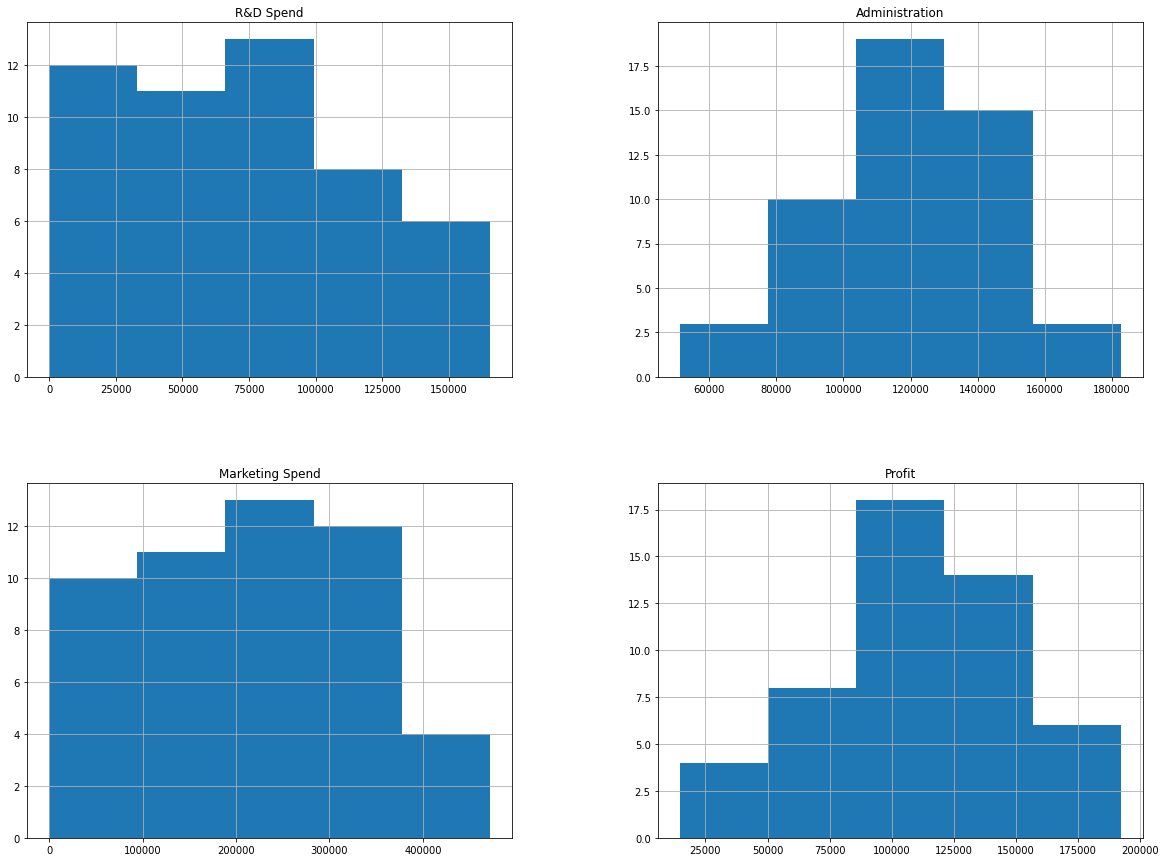

In [60]:
%matplotlib inline
df.hist(bins=5, figsize=(20,15))
plt.show()

In [88]:
#handling categorical data by creating binary features
x.head()
#states2=pd.get_dummies(x['State'])
#states2
#x=x.drop('State',axis=1)
#x=pd.concat([x,states2],axis=1)
#x.head()

states=pd.get_dummies(x['State'])

# Drop the state coulmn
x=x.drop('State',axis=1)

# concat the dummy variables
x=pd.concat([x,states],axis=1)

In [90]:
x.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
regressor= LinearRegression()

In [97]:
regressor.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred= regressor.predict(x_test)
y_pred

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

In [102]:
#computing r2_score which is a kind of MSE loss to see the acuracy of this model, the cores takes values bw 0 and 100%
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [106]:
score=r2_score(y_test,y_pred)
score

0.8987266414329449

In [107]:
mse=mean_squared_error(y_test,y_pred)
mse

82010363.04423532

In [108]:
regressor.intercept_

54343.29984897951

In [110]:
regressor.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02, -3.15260255e+02,
        6.23532751e+02, -3.08272495e+02])

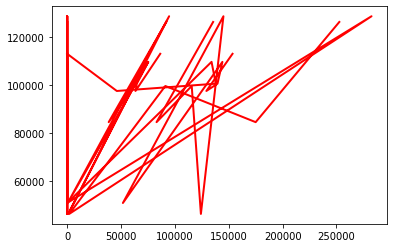

In [114]:
#plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [117]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000
